## Pandas Crash Course (Part 3)

### Filtering DataFrames with one Condition

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [4]:
titanic.sex.head(10)

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: sex, dtype: object

In [5]:
titanic.sex == "male"

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [8]:
titanic[titanic.sex == "male"]["fare"]

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: fare, Length: 577, dtype: float64

In [9]:
titanic.loc[titanic.sex == "male", "fare"]

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: fare, Length: 577, dtype: float64

In [10]:
mask1 = titanic.sex == "male"
mask1

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [11]:
titanic_male = titanic.loc[mask1]

In [12]:
titanic_male.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN


In [13]:
titanic.dtypes# == object

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
deck         object
dtype: object

In [14]:
mask2 = titanic.dtypes == object
mask2

survived    False
pclass      False
sex          True
age         False
sibsp       False
parch       False
fare        False
embarked     True
deck         True
dtype: bool

In [15]:
titanic.loc[:, ~mask2] # '~' means opposite

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [16]:
titanic.loc[mask1, ~mask2]

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
4,0,3,35.0,0,0,8.0500
5,0,3,NaN,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
...,...,...,...,...,...,...
883,0,2,28.0,0,0,10.5000
884,0,3,25.0,0,0,7.0500
886,0,2,27.0,0,0,13.0000
889,1,1,26.0,0,0,30.0000


### Filtering DataFrames with many Conditions (AND)

In [17]:
import pandas as pd

In [18]:
titanic = pd.read_csv("titanic.csv")

In [19]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,NaN,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [20]:
mask1 = titanic.sex == "male"
mask1.head()

0     True
1    False
2    False
3    False
4     True
Name: sex, dtype: bool

In [21]:
mask2 = titanic.age > 14
mask2.head()

0    True
1    True
2    True
3    True
4    True
Name: age, dtype: bool

In [22]:
(mask1 & mask2).head()

0     True
1    False
2    False
3    False
4     True
dtype: bool

In [23]:
male_adult = titanic.loc[mask1 & mask2, ["survived", "pclass", "sex", "age"]]
male_adult.head(20)

,survived,pclass,sex,age
0,0,3,male,22.0
4,0,3,male,35.0
6,0,1,male,54.0
12,0,3,male,20.0
13,0,3,male,39.0
20,0,2,male,35.0
21,1,2,male,34.0
23,1,1,male,28.0
27,0,1,male,19.0
30,0,1,male,40.0


In [24]:
male_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  414 non-null    int64  
 1   pclass    414 non-null    int64  
 2   sex       414 non-null    object 
 3   age       414 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 14.6+ KB


In [25]:
male_adult.describe()

,survived,pclass,age
count,414.000000,414.000000,414.000000
mean,0.173913,2.309179,33.129227
std,0.379493,0.829868,12.922177
min,0.000000,1.000000,15.000000
25%,0.000000,2.000000,23.000000
50%,0.000000,3.000000,30.000000
75%,0.000000,3.000000,40.000000
max,1.000000,3.000000,80.000000


In [26]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Filtering DataFrames with many Conditions (OR)

In [ ]:
import pandas as pd

In [27]:
titanic = pd.read_csv("titanic.csv")

In [28]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [29]:
mask1 = titanic.sex == "female"
mask1.head(20)

0     False
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15     True
16    False
17    False
18     True
19     True
Name: sex, dtype: bool

In [30]:
mask2 = titanic.age < 14
mask2.head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
Name: age, dtype: bool

In [31]:
(mask1 | mask2).head(11)

0     False
1      True
2      True
3      True
4     False
5     False
6     False
7      True
8      True
9      True
10     True
dtype: bool

In [32]:
titanic.loc[mask1 | mask2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,NaN
882,0,3,female,22.0,0,0,10.5167,S,NaN
885,0,3,female,39.0,0,5,29.1250,Q,NaN
887,1,1,female,19.0,0,0,30.0000,S,B


In [33]:
wom_or_chi = titanic.loc[mask1 | mask2, ["survived", "pclass", "sex", "age"]]

In [34]:
wom_or_chi.head()

,survived,pclass,sex,age
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
7,0,3,male,2.0
8,1,3,female,27.0


In [35]:
wom_or_chi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 1 to 888
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  351 non-null    int64  
 1   pclass    351 non-null    int64  
 2   sex       351 non-null    object 
 3   age       298 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.3+ KB


In [36]:
wom_or_chi.describe()

,survived,pclass,age
count,351.000000,351.000000,298.000000
mean,0.723647,2.205128,25.039161
std,0.447832,0.847232,15.314631
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,14.125000
50%,1.000000,2.000000,24.000000
75%,1.000000,3.000000,35.000000
max,1.000000,3.000000,63.000000


In [37]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Creating Columns based on other Columns

In [ ]:
import pandas as pd

In [38]:
titanic = pd.read_csv("titanic.csv")

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [40]:
1912 - titanic.age

0      1890.0
1      1874.0
2      1886.0
3      1877.0
4      1877.0
        ...  
886    1885.0
887    1893.0
888       NaN
889    1886.0
890    1880.0
Name: age, Length: 891, dtype: float64

In [41]:
titanic["YoB"] = 1912 - titanic.age

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,YoB
0,0,3,male,22.0,1,0,7.2500,S,NaN,1890.0
1,1,1,female,38.0,1,0,71.2833,C,C,1874.0
2,1,3,female,26.0,0,0,7.9250,S,NaN,1886.0
3,1,1,female,35.0,1,0,53.1000,S,C,1877.0
4,0,3,male,35.0,0,0,8.0500,S,NaN,1877.0


In [43]:
titanic.sibsp + titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [44]:
titanic["relatives"] = titanic.sibsp + titanic.parch

In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,YoB,relatives
0,0,3,male,22.0,1,0,7.2500,S,NaN,1890.0,1
1,1,1,female,38.0,1,0,71.2833,C,C,1874.0,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,1886.0,0
3,1,1,female,35.0,1,0,53.1000,S,C,1877.0,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,1877.0,0


In [46]:
titanic.drop(columns = ["sibsp", "parch"], inplace = True)

In [47]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,deck,YoB,relatives
0,0,3,male,22.0,7.2500,S,NaN,1890.0,1
1,1,1,female,38.0,71.2833,C,C,1874.0,1
2,1,3,female,26.0,7.9250,S,NaN,1886.0,0
3,1,1,female,35.0,53.1000,S,C,1877.0,1
4,0,3,male,35.0,8.0500,S,NaN,1877.0,0


In [48]:
inflation_factor = 10

In [49]:
titanic.fare*10

0       72.500
1      712.833
2       79.250
3      531.000
4       80.500
        ...   
886    130.000
887    300.000
888    234.500
889    300.000
890     77.500
Name: fare, Length: 891, dtype: float64

In [50]:
titanic.fare = titanic.fare*10

In [51]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,deck,YoB,relatives
0,0,3,male,22.0,72.500,S,NaN,1890.0,1
1,1,1,female,38.0,712.833,C,C,1874.0,1
2,1,3,female,26.0,79.250,S,NaN,1886.0,0
3,1,1,female,35.0,531.000,S,C,1877.0,1
4,0,3,male,35.0,80.500,S,NaN,1877.0,0


### apply(), map() and applymap()

In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [3]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 176.0+ bytes


In [5]:
sales.min(axis = 0)

Mon    17.0
Tue     9.0
Wed    15.0
Thu     8.0
Fri     7.0
dtype: float64

In [6]:
sales.min(axis = 1)

Steven    15.0
Mike       9.0
Andi       8.0
Paul       7.0
dtype: float64

In [7]:
def range(series):
    return series.max() - series.min()

In [12]:
sales.apply(range, axis = 1)

Steven    19.0
Mike      78.0
Andi      46.0
Paul      80.0
dtype: float64

In [8]:
sales.apply(range, axis = 0)

Mon    70.0
Tue    58.0
Wed    59.0
Thu    79.0
Fri    26.0
dtype: float64

In [13]:
sales.apply(lambda x: x.max() - x.min(), axis = 0)

Mon    70.0
Tue    58.0
Wed    59.0
Thu    79.0
Fri    26.0
dtype: float64

In [14]:
sales.apply(lambda x: x.max() - x.min(), axis = 1)

Steven    19.0
Mike      78.0
Andi      46.0
Paul      80.0
dtype: float64

In [15]:
summer = pd.read_csv("summer.csv")

In [16]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [17]:
summer.Athlete.apply(lambda x: x[0])

0        H
1        H
2        D
3        M
4        C
        ..
31160    J
31161    R
31162    T
31163    A
31164    L
Name: Athlete, Length: 31165, dtype: object

In [18]:
summer.Athlete.map(lambda x: x[0])

0        H
1        H
2        D
3        M
4        C
        ..
31160    J
31161    R
31162    T
31163    A
31164    L
Name: Athlete, Length: 31165, dtype: object

In [19]:
summer.iloc[:,1:3].applymap(lambda x: x[0])

,City,Sport
0,A,A
1,A,A
2,A,A
3,A,A
4,A,A
...,...,...
31160,L,W
31161,L,W
31162,L,W
31163,L,W


In [20]:
sales.applymap(lambda x: 0.4*x-5)

,Mon,Tue,Wed,Thu,Fri
Steven,8.6,5.8,1.0,NaN,8.2
Mike,13.0,-1.4,24.6,29.8,-0.2
Andi,1.8,8.2,16.6,-1.8,6.6
Paul,29.8,21.8,5.8,13.0,-2.2


In [21]:
sales*0.4-5

,Mon,Tue,Wed,Thu,Fri
Steven,8.6,5.8,1.0,NaN,8.2
Mike,13.0,-1.4,24.6,29.8,-0.2
Andi,1.8,8.2,16.6,-1.8,6.6
Paul,29.8,21.8,5.8,13.0,-2.2


### The plot() method

In [23]:
import pandas as pd

In [24]:
titanic = pd.read_csv("titanic.csv")

In [25]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 52.3+ KB


In [27]:
import matplotlib.pyplot as plt

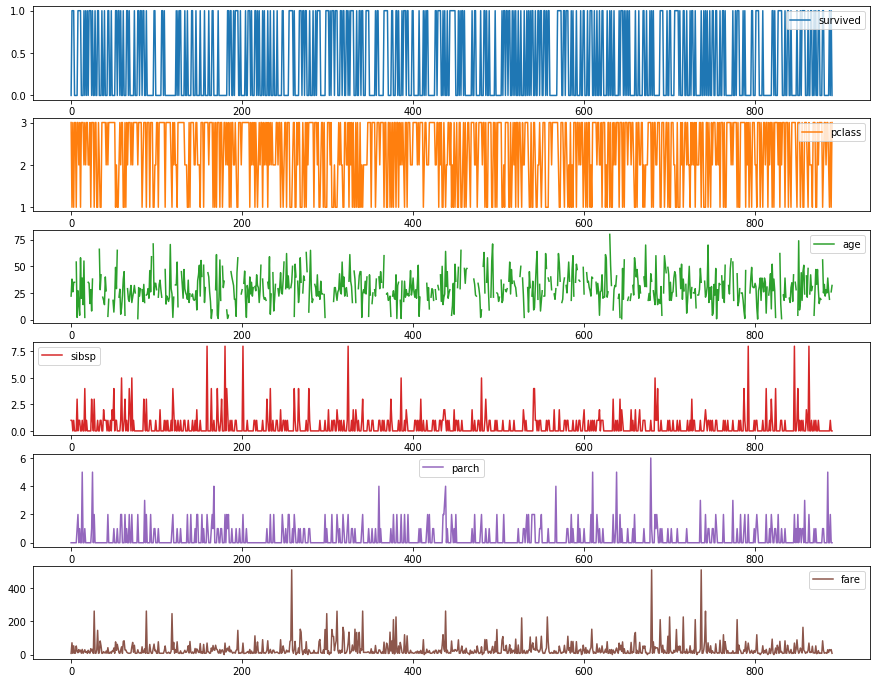

In [28]:
titanic.plot(subplots= True, figsize=(15, 12), sharex= False, sharey=False)
plt.show()

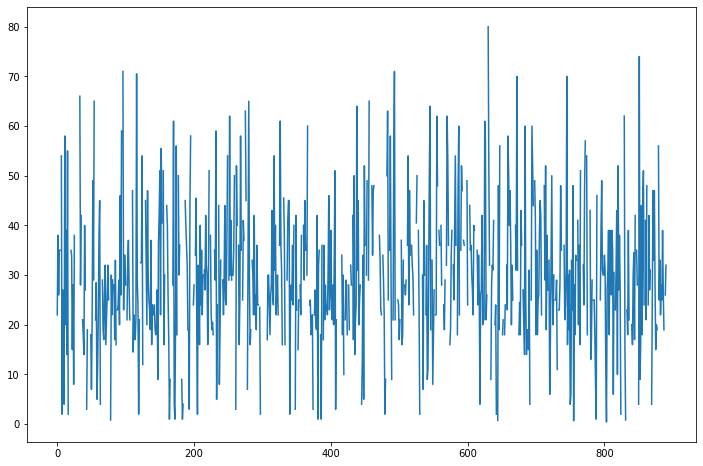

In [29]:
titanic.age.plot(figsize=(12, 8))
plt.show()